In [5]:
install.packages("leaps", repos = "http://cran.us.r-project.org")
install.packages("gbm", repos = "http://cran.us.r-project.org")
install.packages("data.table", repos = "http://cran.us.r-project.org")
install.packages("xgboost", repos = "http://cran.us.r-project.org")
install.packages("Matrix", repos = "http://cran.us.r-project.org")

package 'leaps' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'leaps'"


The downloaded binary packages are in
	C:\Users\Naeem\AppData\Local\Temp\Rtmpuy2Nwd\downloaded_packages
package 'gbm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'gbm'"


The downloaded binary packages are in
	C:\Users\Naeem\AppData\Local\Temp\Rtmpuy2Nwd\downloaded_packages
package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"


The downloaded binary packages are in
	C:\Users\Naeem\AppData\Local\Temp\Rtmpuy2Nwd\downloaded_packages


also installing the dependency 'data.table'



package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"

package 'xgboost' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xgboost'"


The downloaded binary packages are in
	C:\Users\Naeem\AppData\Local\Temp\Rtmpuy2Nwd\downloaded_packages
package 'Matrix' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Matrix'"


The downloaded binary packages are in
	C:\Users\Naeem\AppData\Local\Temp\Rtmpuy2Nwd\downloaded_packages


In [4]:
library(leaps)
library(data.table)
library(gbm)
library(xgboost)
library(Matrix)

ERROR: Error in library(leaps): there is no package called 'leaps'


In [3]:
train.set = fread("train.csv")
train.set = na.omit(train.set)
# train test split
set.seed(100)
nobs = dim(train.set)[1]
split  = 0.7 ## 70/30 split of datatset
train = sample(1:nobs, split*1000, rep = FALSE )
test = -train
traindata = train.set[train,]
testdata = train.set[test,]
testoutcomes = train.set$target[test]
traindata$ID_code = NULL
testdata$ID_code = NULL

ERROR: Error in fread("train.csv"): could not find function "fread"


In [57]:
train.data = sparse.model.matrix(target~.-1,data = traindata)
train.label = traindata[,"target"]
dtrain <- xgb.DMatrix(data = train.data, label = as.matrix(train.label))
test.data = sparse.model.matrix(target~.-1,data = testdata)
test.label = testdata[,"target"]
dtest <- xgb.DMatrix(data = test.data, label = as.matrix(test.label))
#bstSparse <- xgboost(data = dtrain, max.depth = 5, eta = 1, nthread = 2, nrounds = 2, objective = "binary:logistic"
xgb_params = list("objective" = "binary:logistic", 
                  "eval_metric" = "logloss",
                  "max_depth" = 4,
                  "eta" = 0.05)
sets <- list(train = dtrain, test = dtest)

In [58]:
xgmodel = xgb.train(params = xgb_params,
                   data = dtrain,
                   nrounds = 100,
                   watchlist = sets)

[1]	train-logloss:0.655398	test-logloss:0.659705 
[2]	train-logloss:0.619720	test-logloss:0.630061 
[3]	train-logloss:0.588219	test-logloss:0.603322 
[4]	train-logloss:0.558311	test-logloss:0.578928 
[5]	train-logloss:0.531960	test-logloss:0.556688 
[6]	train-logloss:0.506514	test-logloss:0.536534 
[7]	train-logloss:0.483322	test-logloss:0.517401 
[8]	train-logloss:0.462432	test-logloss:0.500524 
[9]	train-logloss:0.442409	test-logloss:0.484308 
[10]	train-logloss:0.423487	test-logloss:0.470178 
[11]	train-logloss:0.405890	test-logloss:0.457105 
[12]	train-logloss:0.389330	test-logloss:0.445655 
[13]	train-logloss:0.374734	test-logloss:0.434352 
[14]	train-logloss:0.360493	test-logloss:0.424183 
[15]	train-logloss:0.346551	test-logloss:0.414768 
[16]	train-logloss:0.333515	test-logloss:0.406188 
[17]	train-logloss:0.321254	test-logloss:0.398251 
[18]	train-logloss:0.309246	test-logloss:0.390923 
[19]	train-logloss:0.298451	test-logloss:0.384495 
[20]	train-logloss:0.287795	test-logloss

integer(0)

Warning message in min(xgmodel$evaluation_log$test_mlogloss):
"no non-missing arguments to min; returning Inf"

[1] Inf

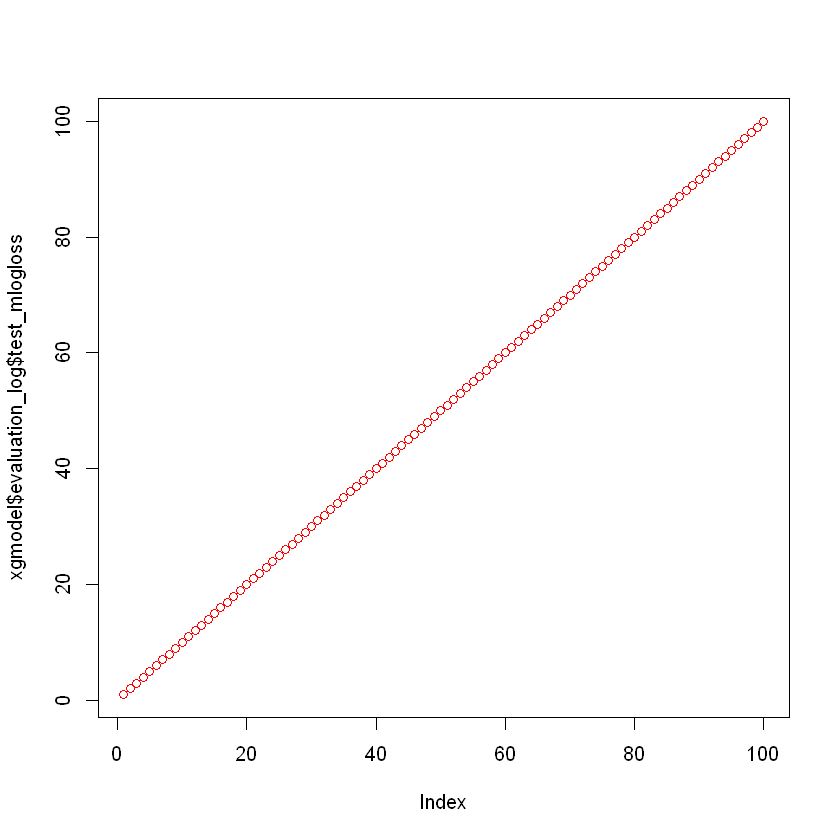

In [61]:
#plot(xgmodel$evaluation_log$iter, xgmodel$evaluation_log$train_mlogloss, col = 'blue')
plot(xgmodel$evaluation_log$iter, xgmodel$evaluation_log$test_mlogloss, col = 'red')
which.min(xgmodel$evaluation_log$test_mlogloss)
min(xgmodel$evaluation_log$test_mlogloss)


In [40]:
#optimizing eta
eta = c(0.01,0.05,0.1,0.2,0.3,0.5,0.75)
counter = 0
logloss = rep(0,length(eta))
for (e in eta){
    xgmodel = xgb.train(params = xgb_params,
                   data = dtrain,
                   nrounds = 50,
                   watchlist = sets,
                       eta = e)
    which.min(xgmodel$evaluation_log$test_mlogloss)
    logloss[counter] = min(xgmodel$evaluation_log$test_mlogloss)
    counter = counter + 1
}

[1]	train-mlogloss:0.684928	test-mlogloss:0.686377 
[2]	train-mlogloss:0.676662	test-mlogloss:0.679774 
[3]	train-mlogloss:0.668828	test-mlogloss:0.673263 
[4]	train-mlogloss:0.660861	test-mlogloss:0.666960 
[5]	train-mlogloss:0.653287	test-mlogloss:0.660733 
[6]	train-mlogloss:0.645603	test-mlogloss:0.654665 
[7]	train-mlogloss:0.638061	test-mlogloss:0.648752 
[8]	train-mlogloss:0.630659	test-mlogloss:0.642943 
[9]	train-mlogloss:0.623628	test-mlogloss:0.637188 
[10]	train-mlogloss:0.616480	test-mlogloss:0.631620 
[11]	train-mlogloss:0.609693	test-mlogloss:0.626011 
[12]	train-mlogloss:0.602787	test-mlogloss:0.620651 
[13]	train-mlogloss:0.596005	test-mlogloss:0.615393 
[14]	train-mlogloss:0.589506	test-mlogloss:0.610168 
[15]	train-mlogloss:0.582948	test-mlogloss:0.605140 
[16]	train-mlogloss:0.576505	test-mlogloss:0.600189 
[17]	train-mlogloss:0.570323	test-mlogloss:0.595241 
[18]	train-mlogloss:0.564088	test-mlogloss:0.590478 
[19]	train-mlogloss:0.558001	test-mlogloss:0.585571 
[2

[1] 7

[1] 0

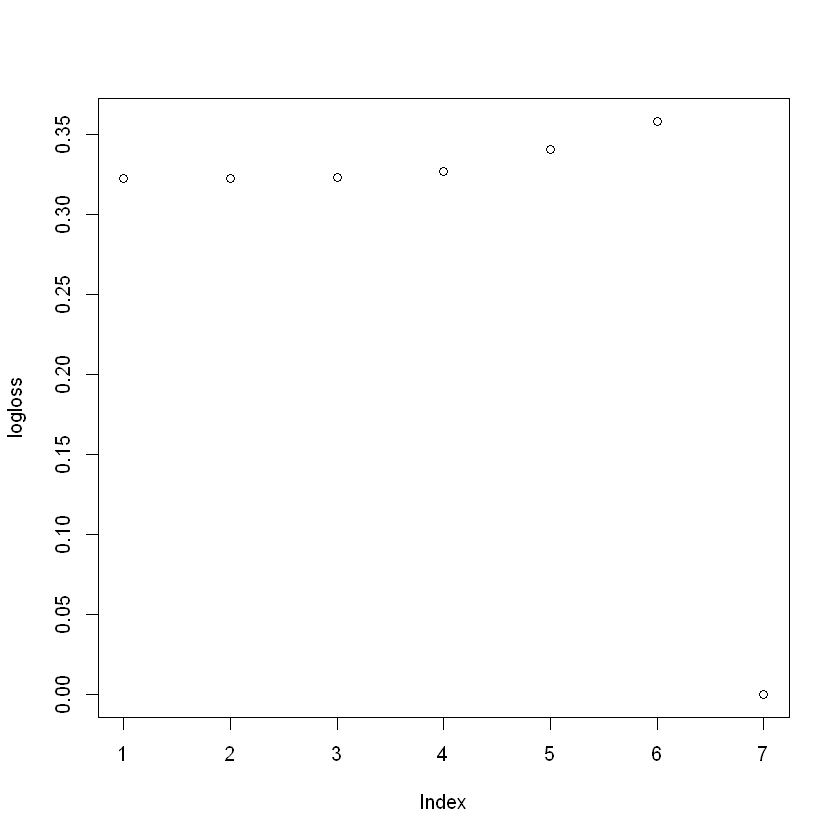

In [45]:
which.min(logloss[])
min(logloss)
plot(logloss)

In [ ]:
# tuning lambda
lambda = c(.00001,.001,.01,.1,.2)
counter = 1
mse.boost = rep(0,5)
for (d in lambda) {
  boost = gbm(target~., data = traindata, distribution = "bernoulli", n.trees = 5000, interaction.depth = 4, shrinkage = d)
  predict.boost = predict(boost, newdata = testdata, n.trees = 5000)
  mse.boost[counter]= mean((predict.boost- testoutcomes)^2)
  counter= counter+1
}


plot(lambda, mse.boost, type= "b", col = "red")
min(mse.boost)

# adjusting lambda has reduced mse further


In [ ]:
which.min(mse.boost)

In [ ]:
# tuning number of trees 
treesize = c(500,1000,5000,10000)
counter = 1
mse.boost = rep(0,4)
for (d in treesize) {
  boost = gbm(target~., data = traindata, distribution = "bernoulli", n.trees = d, interaction.depth = 4, shrinkage =0.0001)
  predict.boost = predict(boost, newdata = testdata, n.trees = d)
  mse.boost[counter]= mean((predict.boost- testoutcomes)^2)
  counter= counter+1
}


plot(treesize, mse.boost, type= "b", col = "red")
min(mse.boost)

In [ ]:
# tuning tree size 
treesize = c(5,10,17,25)
counter = 1
mse.boost = rep(0,4)
for (d in treesize) {
  boost = gbm(target~., data = traindata, distribution = "bernoulli", n.trees = 500, interaction.depth = d, shrinkage =0.0001)
  predict.boost = predict(boost, newdata = testdata, n.trees = d)
  mse.boost[counter]= mean((predict.boost- testoutcomes)^2)
  counter= counter+1
}

plot(treesize, mse.boost, type= "b", col = "red")
min(mse.boost)

In [23]:
boost = gbm(target~.,data = traindata, distribution = "bernoulli", n.trees = 500, interaction.depth = 10, shrinkage = 0.0001)
predict.boost = predict(boost, newdata = testdata, n.trees = 500)
mean((predict.boost - testoutcomes)^2) ## with boosting we reduced the test error

[1] 5.835261

In [45]:
regfit = regsubsets(target~.,data = traindata, nvmax =200, method = "backward")

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"200  linear dependencies found"

In [33]:
val.errors = rep(0,200)
for (i in 1:200){
    coef = coef(regfit, id = i)
    pred = testdata[,names(coef)]%*%as.matrix(coef)
    val.errors[i] = mean((testoutcomes- pred)^2)
}
which.min(val.errors)
coef(regfit, which.min(val.errors))

ERROR: Error in testdata[, names(coef)] %*% as.matrix(coef): requires numeric/complex matrix/vector arguments


[1] 138

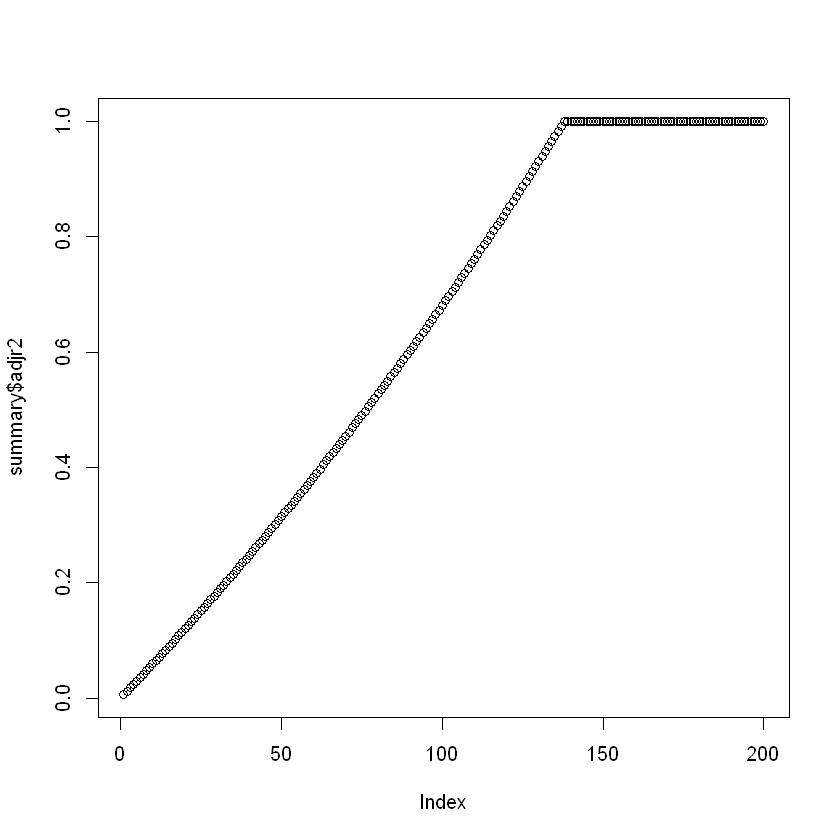

In [42]:
which.max(summary$adjr2)
plot(summary$adjr2)